<a href="https://colab.research.google.com/github/sun9huni/first-repository/blob/main/Quest4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quest 04: 통계 기초

## 문제 1)

- 빵집에서는 매일 아침에 구워지는 식빵 한 개의 평균 무게가 500g이 되도록 맞추고자 합니다. 빵집 주인은 오늘 아침에 구운 식빵 중에서 랜덤하게 25개의 식빵을 샘플링하여 무게를 측정했습니다. 그 결과, 표본 평균은 495g, 표준편차는 10g으로 나왔습니다. 빵집 주인이 목표한 500g의 무게를 충족하고 있는지(다시말해 목표 무게를 넘는지 안 넘는지)  5% 유의수준에서 검정해보세요

In [1]:
import scipy.stats as stats

# 주어진 데이터
sample_mean = 495
sample_std = 10
sample_size = 25
population_mean = 500
alpha = 0.05

# t-통계량 계산
standard_error = sample_std / (sample_size ** 0.5)
t_statistic = (sample_mean - population_mean) / standard_error

# 단측 검정
df = sample_size - 1
p_value = stats.t.cdf(t_statistic, df)

# 결과 출력
if p_value < alpha:
    result = f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다."
else:
    result = f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 빵의 평균 무게는 목표와 통계적으로 차이가 없습니다."

print(result)


t-값: -2.5000, p-value: 0.0098. 유의수준 0.05에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.


## 문제2) 분포 시각화

문제 1번을 바탕으로 분포를 그리고 t통계량을 빨간색 점선으로, 초록색 점선으로 임계값을 기각역을 초록색으로 칠해보세요.

***기각역**:  통계량이 들어왔을 경우 귀무가설을 기각할 수 있는 영역을 말합니다.

 Hint)

- `plt.axvline` : y축 평행선 그리기
- `plt.fill_between` : 그래프 면적 색칠하기
- 예시결과

<ipython-input-30-535a7bc128c4>:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


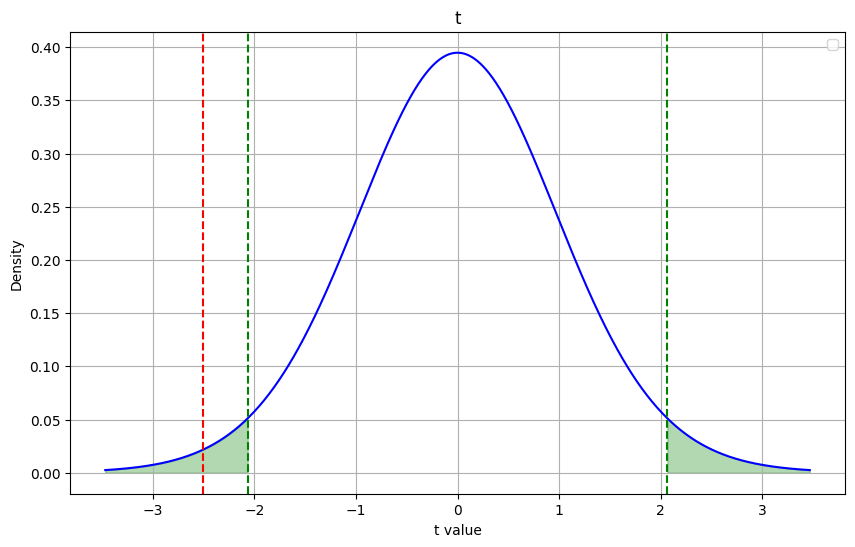

In [30]:
import numpy as np
import matplotlib.pyplot as plt


# 양측 검정 임계값 계산
critical_value_low = stats.t.ppf(alpha/2, df)
critical_value_high = stats.t.ppf(1 - alpha/2, df)

# t 분포 범위 설정
x = np.linspace(stats.t.ppf(0.001, df), stats.t.ppf(0.999, df), 1000)
pdf = stats.t.pdf(x, df)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, 'b-')

# 기각역 색칠 (양쪽 꼬리)
plt.fill_between(x, 0, pdf, where=(x < critical_value_low), color='g', alpha=0.3,)
plt.fill_between(x, 0, pdf, where=(x > critical_value_high), color='g', alpha=0.3,)

# t-통계량 빨간색 점선
plt.axvline(t_statistic, color='r', linestyle='--',)

# 임계값 초록색 점선
plt.axvline(critical_value_low, color='g', linestyle='--', )
plt.axvline(critical_value_high, color='g', linestyle='--', )

plt.title('t')
plt.xlabel('t value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


## 문제 3) 단일 t 표본 검정

- 어느 학교에서 새로운 교육 프로그램을 도입한 후 학생들의 수학 성적이 향상되었는지 확인하려고 합니다. 프로그램 도입 후 무작위로 선택한 16명의 학생들의 수학 성적 평균은 78점이고, 모집단의 평균은 75점입니다. 모집단의 표준편차는 알 수 없다고 합니다.
- 유의수준 0.05에서 이 교육 프로그램이 성적 향상에 효과가 있는지 단일 표본 t-검정을 실시하세요.

<aside>
💡

수업시간에 양측검정을 기준으로 배웠습니다. 다시말하면 데이터의 평균이 특정 값과 같은지 아닌지(방향은 관심없음)입니다. 문제는 **향상에 효과가 있는지** 에 대한 물음입니다. 함수를 무엇을 어떻게 넣어야할지 고민해보세요!(힌트 scipy docs 참고)

</aside>

In [31]:
# 표본 점수 예시 (평균 78점과 일치)
sample_scores = [79, 77, 80, 76, 78, 81, 75, 79, 77, 80, 78, 76, 82, 77, 79, 78]
population_mean = 75
alpha = 0.05

# 단일 표본 t-검정 (양측)
t_stat, p_value = stats.ttest_1samp(sample_scores, population_mean)

# "향상"만 관심있으므로 단측(p/2, t>0일 때만)
if t_stat > 0:
    p_value = p_value / 2
else:
    p_value = 1 - (p_value / 2)

if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 교육프로그램은 효과가 없습니다.")


t-값: 6.7890, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.


## 문제 4) 독립 표본 t 검정

- 한 연구소에서 두 가지 새로운 다이어트 프로그램의 효과를 비교하려고 합니다. 연구소는 두 그룹의 참가자들을 대상으로 12주간 다이어트 프로그램을 진행한 후 체중 감소량을 측정했습니다.
- 유의수준 5% 에서 두 그룹 간 평균 체중 감소량에 유의미한 차이가 있는지 독립 표본 t-검정을 실시하세요.

<aside>
💡

관찰연구에서는  두개의 그룹을 t검정을 할때 등분산성을 검정하게 됩니다.  `scipy.stats.levene` 문서를 읽고 등분산 검정 후 적절한 검정방법을 적용해보세요. 등분산 검정에도 역시 귀무가설과 대립가설이 존재합니다.

</aside>

In [32]:
# 그룹 A와 B의 체중 감소량 데이터
group_A = [5.1, 4.7, 6.2, 4.9, 5.3, 6.1, 5.0, 5.8, 4.8, 5.2]
group_B = [4.3, 4.1, 3.8, 4.6, 4.0, 4.5, 3.7, 4.2, 3.9, 4.4, 3.5, 4.3]
alpha = 0.05

# 1. Levene 등분산성 검정
levene_stat, levene_p = stats.levene(group_A, group_B)

# 2. 등분산성 검정 결과에 따라 독립 표본 t-검정 수행
if levene_p > alpha:
    # 등분산 가정
    t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=True)
else:
    # 등분산 가정하지 않음
    t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=False)

# 결과 출력
if p_value < alpha:
    result = f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다."
else:
    result = f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 다이어트 프로그램은 효과가 없습니다"

print(result)


t-값: 6.3898, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.


## 문제 5) 대응표본 t검정

<aside>
💡

대응표본 t-검정은 두 집단간 평균 차이를 비교할 때 사용되는 점은 독립 t검정 동일하나, 같은 집단에서 두 번 수집할 때 사용되는 검정입니다.( ex 고혈압 투여 전후 환자 단일 그룹의 혈압의 차) `scipy.stats` docs에서 적절한 함수를 찾아보고 적용해보세요.

</aside>

- 운동 프로그램 전후의 체중 변화를 분석하기 위해 10명의 참가자의 체중을 측정했습니다. 유의수준 5%에서 운동 프로그램이 체중 감소에 효과가 있는지 **대응 표본 t-검정**을 실시하세요.
- 또한, 대응표본t검정에서 등분산 검정이 필요한지 고민해봅시다.

In [33]:
# 운동 전후 체중 데이터
before = np.array([70, 80, 65, 90, 75, 85, 78, 82, 68, 73])
after = np.array([68, 78, 64, 88, 74, 83, 77, 80, 67, 72])
alpha = 0.05

# 대응표본 t-검정
t_stat, p_value = stats.ttest_rel(before, after)

# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 운동 프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 운동 프로그램은 효과가 없습니다.")


t-값: 9.0000, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 운동 프로그램은 효과가 있습니다.


In [6]:
# 등분산 검정은 대응표본 t 검정에는 필요하지 않다.
# 대응표본 t-검정에서는 같은 집단의 두 데이터를 비교하므로, 각 쌍의 차이값이 정규분포를 따른다면 두 집단의 분산이 같은지(등분산성)는 검정하지 않아도 된다.

In [34]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")
print("Path to dataset files:", path)
retail = pd.read_csv(path + '/' + os.listdir(path)[0])
retail.head(3)

Path to dataset files: /kaggle/input/online-retail-ii-uci


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [35]:
# 영국 주문 데이터 필터링
uk_data = retail[retail['Country'] == 'United Kingdom']

# TotalPrice 컬럼 생성
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['Price']

# 표본 추출 및 평균 계산 함수
def sample_mean(data, size):
    sample = data.sample(n=size, random_state=42)
    return sample['TotalPrice'].mean()

# 모집단 평균
population_mean = uk_data['TotalPrice'].mean()

# 표본 크기별 평균 계산
mean_30 = sample_mean(uk_data, 30)
mean_100 = sample_mean(uk_data, 100)
mean_300 = sample_mean(uk_data, 300)

print(f"Sample size: 30, Mean TotalPrice: {mean_30:.2f}")
print(f"Sample size: 100, Mean TotalPrice: {mean_100:.2f}")
print(f"Sample size: 300, Mean TotalPrice: {mean_300:.2f}")


Sample size: 30, Mean TotalPrice: 11.88
Sample size: 100, Mean TotalPrice: 16.09
Sample size: 300, Mean TotalPrice: 13.34


<ipython-input-35-0c7d15233143>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['Price']


## 문제 7) 신뢰구간

- 영국 데이터에서 TotalPrice를 사용하여 95% 신뢰 구간을 계산하세요. 또한 표본의 크기가 30,100, 300으로 변하면서 신뢰구간이 변하는 형태를 확인해 보세요.
- Hint) `stats` 모듈에서 신뢰구간을 바로 구하는 함수를 확인해보세요.

In [36]:
# 신뢰구간 계산 함수
def confidence_interval(data, confidence=0.95):
    mean = data.mean()
    std_err = stats.sem(data)
    interval = stats.t.interval(confidence, len(data)-1, loc=mean, scale=std_err)
    return mean, interval

# 표본 크기별 신뢰구간 출력
sample_sizes = [30, 100, 300]
for size in sample_sizes:
    sample = uk_data.sample(size, random_state=42)
    mean, interval = confidence_interval(sample['TotalPrice'])
    print(f"Sample size: {size}, Mean: {mean:.2f}, 95% CI: {interval}")


Sample size: 30, Mean: 11.88, 95% CI: (np.float64(6.37841466090658), np.float64(17.38425200576009))
Sample size: 100, Mean: 16.09, 95% CI: (np.float64(11.142955150004974), np.float64(21.02784484999502))
Sample size: 300, Mean: 13.34, 95% CI: (np.float64(11.264027626023802), np.float64(15.424439040642865))


## 문제 8 가설검정 t-test

- 영국과 독일의 고객의 평균 구매금액(Total Price)가 동일한지 검정해보세요. 귀무가설과 대립가설을 세우고 통계검정을 통해 결과를 해석하세요
- 영국과 독일의 분포는 등분산성은 따른다고 가정

In [37]:
# 전처리: 결측치, 음수/0 제거
retail = retail[pd.notnull(retail['Customer ID'])]
retail = retail[retail['Quantity'] > 0]
retail = retail[retail['Price'] > 0]

# Total Price 계산
retail['TotalPrice'] = retail['Price'] * retail['Quantity']

# 영국, 독일 데이터 추출
uk = retail[retail['Country'] == 'United Kingdom']['TotalPrice']
de = retail[retail['Country'] == 'Germany']['TotalPrice']

# 등분산 가정 하 독립표본 t-검정
t_stat, p_value = stats.ttest_ind(uk, de, equal_var=True)

# 결과 출력
if p_value < 0.05:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.")
else:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 없습니다.")

print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}")


영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.
t-값: -3.0548, p-value: 0.0023


<ipython-input-37-00f91bcba9a1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['TotalPrice'] = retail['Price'] * retail['Quantity']


# 2. A/B 테스트

문제 9~ 10) A/B test스타트업A에서 새로운 여행 패키지 상품 판매를 진행하고자 합니다. 패키지 판매 기획자는 새로운 패키지의 상품 판매 효율을 높이고 싶어하며, 이를 위해 기존에 상품이 판매되던 웹 페이지 (페이지 A) 가 아닌 새로운 웹 페이지 (페이지 B)를 통해 판매하고자 합니다. 패키지 판매 기획자는 신규 웹페이지 (페이지 B) 가 기존 (페이지 A) 대비 효과가 좋은 지 확인하기 위해 A/B 테스트를 진행하였습니다.

- 페이지 A: 기존에 운영하던 패키지 판매 웹 페이지
- 페이지 B: 새롭게 생성한 패키지 판매 웹 페이지


## **문제9)**

- 결과를 바탕으로 패키지 기획자는 페이지 B의 효과에 대해 어떤 결정을 해야 할지 서술해 주세요.
- Hint) https://abtestguide.com/calc/  를 사용하여 해석해보세요

In [38]:
from scipy.stats import norm

n_A = 1000
x_A = 80
n_B = 200
x_B = 22

p_A = x_A / n_A  # 0.08
p_B = x_B / n_B  # 0.11
p_pool = (x_A + x_B) / (n_A + n_B)  # 0.085

se = (p_pool*(1-p_pool)*(1/n_A + 1/n_B))**0.5  # 0.0216
z = (p_B - p_A)/se  # 1.3888
p_value = 2*(1 - norm.cdf(abs(z)))  # 0.1649

print(f"{z:.4f}")
print(f"{p_value:.4f}")


1.3888
0.1649


A/B 테스트 분석 결과, 페이지A의 전환율은 80/1000 = 8.0%이고, 페이지B의 전환율은 22/200 = 11.0%이다.
p-value 값은 0.1649로 유의 수준이니 0.05를 초과하여 페이지B의 전환률 상승이 통계적으로 유의미하지 않음을 나타낸다. 또한 SRM 즉 실험에 참가한 사람 수가 두 그룹에 고르게 나눠지지 않았지 때문에 표본이 치우쳐서 실험결과가 신뢰할 수 없게 되었다. 이에 실험 설계를 바꿔서 다시 실행해야 한다.


## **문제 10)**

- A/B 테스트의 결과가 통계적으로 유의하나 효과의 차이 자체는 매우 작은 경우, 어떤 의사결정을 할 수 있을지 사례를 통해 설명해 주세요.
- Hint) A/B 관련 자료를 찾아보세요(추천 문헌 [요즘IT](https://yozm.wishket.com/))


A/B 테스트에서 통계적으로 유의한 차이가 나타나더라도 효과의 크기가 매우 작다면 단순히 변화가 의미있다고 결론짓지 말아야 한다. 이보다는 실제 비즈니스에 미치는 영향, 추가 비용, 리스크 등을 고려해야 한다. 예를 들어 전환율이 조금 오르더라도 그로 인한 매출 증가가 개발 비용보다 적거나 고객 경험에 영향을 주지 못한다면 변경을 하지 않는 것이 합리적이다. 이에 통계적 유의성과 실질적 가치를 둘 다 고려해서 의사결정을 해야 한다.